<a href="https://colab.research.google.com/github/mdanyassri/C112/blob/main/C112.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Hello colab")

Hello colab


In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving savings_data_final.csv to savings_data_final.csv


In [ ]:
import pandas as pd
import statistics
import plotly.express as px

In [ ]:
df = pd.read_csv("savings_data_final.csv")
fig = px.scatter(df, y = "quant_saved", color = "rem_any") 
fig.show()

In [ ]:
import csv

with open("savings_data_final.csv", newline= "")as f:
  reader = csv.reader(f)
  savings_data = list(reader)

savings_data.pop(0)

total_entries = len(savings_data)
total_people_given_remainder = 0
for data in savings_data:
  if int(data[3]) ==1:
    total_people_given_remainder +=1

import plotly.graph_objects as go 
fig = go.Figure(go.Bar(x = ["Remainded", "Not Remainded"], y = [total_people_given_remainder, (total_entries - total_people_given_remainder)]))
fig.show()

In [ ]:
all_savings = []
for data in savings_data:
  all_savings.append(float(data[0]))

print(f"mean of savings - {statistics.mean(all_savings)}")
print(f"median of savings - {statistics.median(all_savings)}")
print(f"mode of savings - {statistics.mode(all_savings)}")

mean of savings - 85.32780331328739
median of savings - 39.2724
mode of savings - 0.0


In [ ]:
remainded_savings = []
not_remainded_savings = []
for data in savings_data:
  if int(data[3]) ==1:
    remainded_savings.append(float(data[0]))
  else:
    not_remainded_savings.append(float(data[0]))
  
print("Result for people who were remainded to save")
print(f"mean of savings - {statistics.mean(remainded_savings)}")
print(f"median of savings - {statistics.median(remainded_savings)}")
print(f"mode of savings - {statistics.mode(remainded_savings)}")

print("\n\n")

print("Result for people who were not remainded to save")
print(f"mean of savings - {statistics.mean(not_remainded_savings)}")
print(f"median of savings - {statistics.median(not_remainded_savings)}")
print(f"mode of savings - {statistics.mode(not_remainded_savings)}")

Result for people who were remainded to save
mean of savings - 82.56940908263547
median of savings - 39.2724
mode of savings - 0.0



Result for people who were not remainded to save
mean of savings - 89.67095185226523
median of savings - 36.0475
mode of savings - 0.0


In [ ]:
print(f"stddev of all savings - {statistics.stdev(all_savings)}")
print(f"stddev of people who were remainded - {statistics.stdev(remainded_savings)}")
print(f"stddev of people who were not remainded - {statistics.stdev(not_remainded_savings)}")

stddev of all savings - 196.75453011909315
stddev of people who were remainded - 173.24866414440817
stddev of people who were not remainded - 228.875050299707


In [ ]:
import numpy as np

age = []
savings = []
for data in savings_data:
  if float(data[5]) !=0:
    age.append(float(data[5]))
    savings.append(float(data[0]))

correlation = np.corrcoef(age, savings)
print(f"Correlation between the age of person and their savings - {correlation[0, 1]}")

Correlation between the age of person and their savings - 0.03663447975985462


In [ ]:
import plotly.figure_factory as ff

fig = ff.create_distplot([df["quant_saved"].tolist()], ["Savings"], show_hist = False)
fig.show()

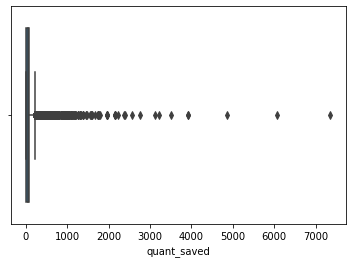

In [ ]:
import seaborn as sns 
sns.boxplot(data = df, x = df["quant_saved"])

In [ ]:
q1 = df["quant_saved"].quantile(0.25)
q3 = df["quant_saved"].quantile(0.75)
iqr = q3 - q1

print(f"Q1 - {q1}")
print(f"Q3 - {q3}")
print(f"IQR - {iqr}")

lower_whisker = q1-1.5*iqr
upper_whisker = q3+1.5*iqr

print(f"Lower Whisker - {lower_whisker}")
print(f"Upper Whisker - {upper_whisker}")

new_df = df[df['quant_saved'] < upper_whisker]

Q1 - 2.2840000000000003
Q3 - 86.514
IQR - 84.22999999999999
Lower Whisker - -124.06099999999998
Upper Whisker - 212.85899999999998


In [ ]:
all_savings = new_df["quant_saved"].tolist()
print(f"mean of savings - {statistics.mean(all_savings)}")
print(f"median of savings - {statistics.median(all_savings)}")
print(f"mode of savings - {statistics.mode(all_savings)}")
print(f"stddev of all savings - {statistics.stdev(all_savings)}")

fig = ff.create_distplot([new_df["quant_saved"].tolist()], ["Savings"], show_hist=False)
fig.show()

mean of savings - 46.200519389818794
median of savings - 36.0475
mode of savings - 0.0
stddev of all savings - 50.866871917288634


In [ ]:
import random
import plotly.figure_factory as ff

sampling_mean_list = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(all_savings))
  sampling_mean_list.append(statistics.mean(temp_list))

mean_sampling = statistics.mean(sampling_mean_list)
fig = ff.create_distplot([sampling_mean_list], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x = [mean_sampling, mean_sampling], y = [0, 0.1], mode = "lines", name = "MEAN"))
fig.show()

In [ ]:
print(f"stddev of sampling data - {statistics.stdev(sampling_mean_list)}")

stddev of sampling data - 5.1360678833769295


In [ ]:
print(f"mean of all savings - {statistics.mean(all_savings)}")
print(f"mean of sampling data - {statistics.mean(sampling_mean_list)}")

mean of all savings - 46.200519389818794
mean of sampling data - 46.14108587458202


In [ ]:
import numpy as np
temp_df = new_df[new_df.age!=0] 
age = temp_df["age"].tolist()
savings = temp_df["quant_saved"].tolist()

correlation = np.corrcoef(age, savings)
print(f"correlation between age of a person and their savings - {correlation[0, 1]}")

correlation between age of a person and their savings - 0.08561544120342093


In [ ]:
remainded_df = new_df.loc[new_df["rem_any"]==1]
not_remainded_df = new_df.loc[new_df["rem_any"]==0]
print(remainded_df.head())
print(not_remainded_df.head())

fig = ff.create_distplot([not_remainded_df["quant_saved"].tolist()],["Savings(Not Remainded)"], show_hist=False)
fig.show()

   quant_saved  female  highschool_completed  rem_any  wealthy   age
0      13.0908       1                     0        1        0  28.0
1      39.2724       0                     1        1        1   0.0
3      58.9086       1                     1        1        1   0.0
4      78.5448       1                     1        1        1   0.0
5      39.2724       1                     1        1        1  43.0
    quant_saved  female  highschool_completed  rem_any  wealthy   age
11      39.2724       1                     1        0        1  26.0
12      58.9086       1                     1        0        1   0.0
14      78.5448       1                     1        0        0  32.0
31       2.2840       1                     1        0        1  29.0
34       2.2840       1                     1        0        1  28.0


In [ ]:
not_remainded_savings = not_remainded_df["quant_saved"].tolist()
sampling_mean_list_not_remainded = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(not_remainded_savings))
  sampling_mean_list_not_remainded.append(statistics.mean(temp_list))

mean_sampling_not_remainded = statistics.mean(sampling_mean_list_not_remainded)
stddev_sampling_not_remainded = statistics.stdev(sampling_mean_list_not_remainded)
print(f"mean of sampling not remainded --> {mean_sampling_not_remainded}")
print(f"stddev of sampling not remainded --> {stddev_sampling_not_remainded}")

fig = ff.create_distplot([sampling_mean_list_not_remainded], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x = [mean_sampling, mean_sampling], y = [0, 0.1], mode = "lines", name = "MEAN"))
fig.show()

mean of sampling not remainded --> 43.68078808781922
stddev of sampling not remainded --> 5.103749119089427


In [ ]:
first_stddev_start = mean_sampling_not_remainded - stddev_sampling_not_remainded
first_stddev_end = mean_sampling_not_remainded + stddev_sampling_not_remainded
print(f"First(start) - {first_stddev_start} and First(end) - {first_stddev_end}")

second_stddev_start = mean_sampling_not_remainded - (2*stddev_sampling_not_remainded)
second_stddev_end = mean_sampling_not_remainded + (2*stddev_sampling_not_remainded)
print(f"Second(start) - {second_stddev_start} and Second(end) - {second_stddev_end}")

third_stddev_start = mean_sampling_not_remainded - (3*stddev_sampling_not_remainded)
third_stddev_end = mean_sampling_not_remainded + (3*stddev_sampling_not_remainded)
print(f"Third(start) - {third_stddev_start} and Third(end) - {third_stddev_end}")

First(start) - 38.57703896872979 and First(end) - 48.784537206908645
Second(start) - 33.473289849640366 and Second(end) - 53.88828632599807
Third(start) - 28.369540730550938 and Third(end) - 58.992035445087495


In [ ]:
remainded_savings = remainded_df["quant_saved"].tolist()
sampling_mean_list_remainded = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(remainded_savings))
  sampling_mean_list_remainded.append(statistics.mean(temp_list))

mean_sampling_remainded = statistics.mean(sampling_mean_list_remainded)
stddev_sampling_remainded = statistics.stdev(sampling_mean_list_remainded)
print(f"mean of sampling remainded --> {mean_sampling_remainded}")
print(f"stddev of sampling remainded --> {stddev_sampling_remainded}")

fig = ff.create_distplot([sampling_mean_list_remainded], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x = [mean_sampling, mean_sampling], y = [0, 0.1], mode = "lines", name = "MEAN"))
fig.show()

mean of sampling remainded --> 47.58246146013518
stddev of sampling remainded --> 5.066077801347975


In [ ]:
z_score = (mean_sampling_remainded - mean_sampling_not_remainded)/stddev_sampling_not_remainded
print(f"z score is - {z_score}")

z score is - 0.7644720148415268
